In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### Data Cleaning

In [4]:
# Concatenate both the training and the testing data together to make it easy to perform operatiions on both
data = pd.concat([train,test],axis = 0)
print(data.shape)

(2919, 81)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
# finding percentage of missing values in each feature that exceeds 20%
print((data.isnull().sum()/len(data)*100).round(2)[(data.isnull().sum()/len(data)*100) >=20])

Alley          93.22
FireplaceQu    48.65
PoolQC         99.66
Fence          80.44
MiscFeature    96.40
SalePrice      49.98
dtype: float64


In [7]:
# Features with missing values more than 30% can be dropped and will hardly play any significance in the modelling

features_to_drop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id']
data = data.drop(features_to_drop,axis = 1)

In [8]:
data.shape
# We have dropped 6 collumns

(2919, 75)

In [9]:
# Create new features based on intuition
data['TotalArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GrLivArea'] +data['GarageArea']

data['Bathrooms'] = data['FullBath'] + data['HalfBath']*0.5 

data['Year average']= (data['YearRemodAdd'] + data['YearBuilt'])/2

In [10]:
# Collumns having at least one Nan value
print("Columns having at least one NaN Value:" + str((data.isnull().sum()/len(data)*100).round(2)[(data.isnull().sum()/len(data)*100) >0.0].count()))

Columns having at least one NaN Value:31


In [11]:
print("Columns having at least one NaN Value:" + str((data.isnull().sum()/len(data)*100).round(2)[(data.isnull().sum()/len(data)*100) >0.0].sort_values(ascending = False)))

Columns having at least one NaN Value:SalePrice       49.98
LotFrontage     16.65
GarageCond       5.45
GarageQual       5.45
GarageFinish     5.45
GarageYrBlt      5.45
GarageType       5.38
BsmtCond         2.81
BsmtExposure     2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
Utilities        0.07
TotalArea        0.07
BsmtFullBath     0.07
BsmtHalfBath     0.07
Functional       0.07
BsmtFinSF2       0.03
BsmtUnfSF        0.03
BsmtFinSF1       0.03
Electrical       0.03
KitchenQual      0.03
GarageCars       0.03
Exterior2nd      0.03
Exterior1st      0.03
GarageArea       0.03
SaleType         0.03
TotalBsmtSF      0.03
dtype: float64


In [12]:
# Deal with the NaN values now!
nan_val = (data.isnull().sum()/len(data)*100).round(2)[(data.isnull().sum()/len(data)*100) >0.0].sort_values(ascending = False).index.to_list()
nan_val

['SalePrice',
 'LotFrontage',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageYrBlt',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'Utilities',
 'TotalArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'Electrical',
 'KitchenQual',
 'GarageCars',
 'Exterior2nd',
 'Exterior1st',
 'GarageArea',
 'SaleType',
 'TotalBsmtSF']

In [13]:
# Finding Data types of the features
data_nan_val = (data[nan_val].dtypes ==object)
data_nan_val = data_nan_val.astype('str')
data_nan_val

SalePrice       False
LotFrontage     False
GarageCond       True
GarageQual       True
GarageFinish     True
GarageYrBlt     False
GarageType       True
BsmtCond         True
BsmtExposure     True
BsmtQual         True
BsmtFinType2     True
BsmtFinType1     True
MasVnrType       True
MasVnrArea      False
MSZoning         True
Utilities        True
TotalArea       False
BsmtFullBath    False
BsmtHalfBath    False
Functional       True
BsmtFinSF2      False
BsmtUnfSF       False
BsmtFinSF1      False
Electrical       True
KitchenQual      True
GarageCars      False
Exterior2nd      True
Exterior1st      True
GarageArea      False
SaleType         True
TotalBsmtSF     False
dtype: object

In [14]:
obj_nan_val = data_nan_val[data_nan_val == 'True'].index.to_list()
num_nan_val = data_nan_val[data_nan_val == 'False'].index.to_list()
print("Object data type Features:\n")
print(obj_nan_val)
print("\n")
print("Numeric data type Features:\n")
print(num_nan_val)

Object data type Features:

['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Electrical', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType']


Numeric data type Features:

['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'TotalArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


In [15]:
num_nan_val.remove('SalePrice')

In [16]:
# USing LAbel Encoder we will not transform the object type inputs into numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(data.shape[1]):
    if data.iloc[:,i].dtypes == object:
        le.fit(list(data.iloc[:,i].values))
        data.iloc[:,i] = le.transform(list(data.iloc[:,i].values))
# Confirm that the code is working properly
print(data['GarageCond'].unique())

[4 1 5 2 3 0]


In [17]:
# Fill the NaN values with the mode and the median for the object_NaN and the numeric_NaN values respectively
data[num_nan_val] = data[num_nan_val].fillna(data[num_nan_val].median())

for j in data[obj_nan_val]:
    data[j] = data[j].fillna(data[j].mode())  

In [18]:
# Split the data back into test data and train data
test_data = data[data.SalePrice.isnull() == True]
test_data = test_data.drop("SalePrice",axis = 1)
train_data = data.dropna(axis = 0)

In [19]:
print("Shape of training data after data cleaning:")
print(train_data.shape)
print("Shape of testing data after data cleaning:")
print(test_data.shape)
# We have dropped out 6 columns

Shape of training data after data cleaning:
(1460, 78)
Shape of testing data after data cleaning:
(1459, 77)


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64


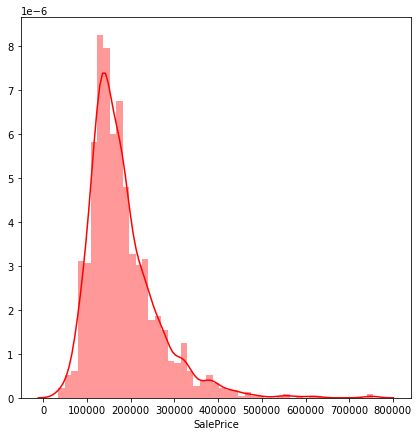

In [20]:
print(train_data.SalePrice.describe().round(2))
plt.figure(figsize = (7,7))
sns.distplot(train_data.SalePrice,color = 'red')

#### Handling the outliers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


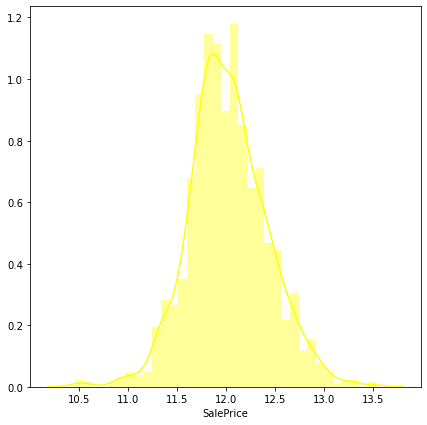

In [21]:
# Log transform the target variable for handling the outliers
train_data["SalePrice"] = np.log(train_data['SalePrice'])
plt.figure(figsize = (7,7))
sns.distplot(train_data.SalePrice,color = 'yellow')

In [22]:
train_data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Bathrooms,Year average
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.686301,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,12.024051,4555.492466,1.756507,1978.066781
std,42.300571,0.632017,22.037950,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,0.399452,1433.745228,0.636015,22.791441
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,10.460242,668.000000,0.000000,1915.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,11.775097,3552.000000,1.000000,1961.000000
50%,50.000000,3.000000,68.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,12.001505,4385.500000,2.000000,1977.500000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,12.273731,5324.500000,2.500000,2000.625000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,13.534473,18812.000000,3.500000,2010.000000


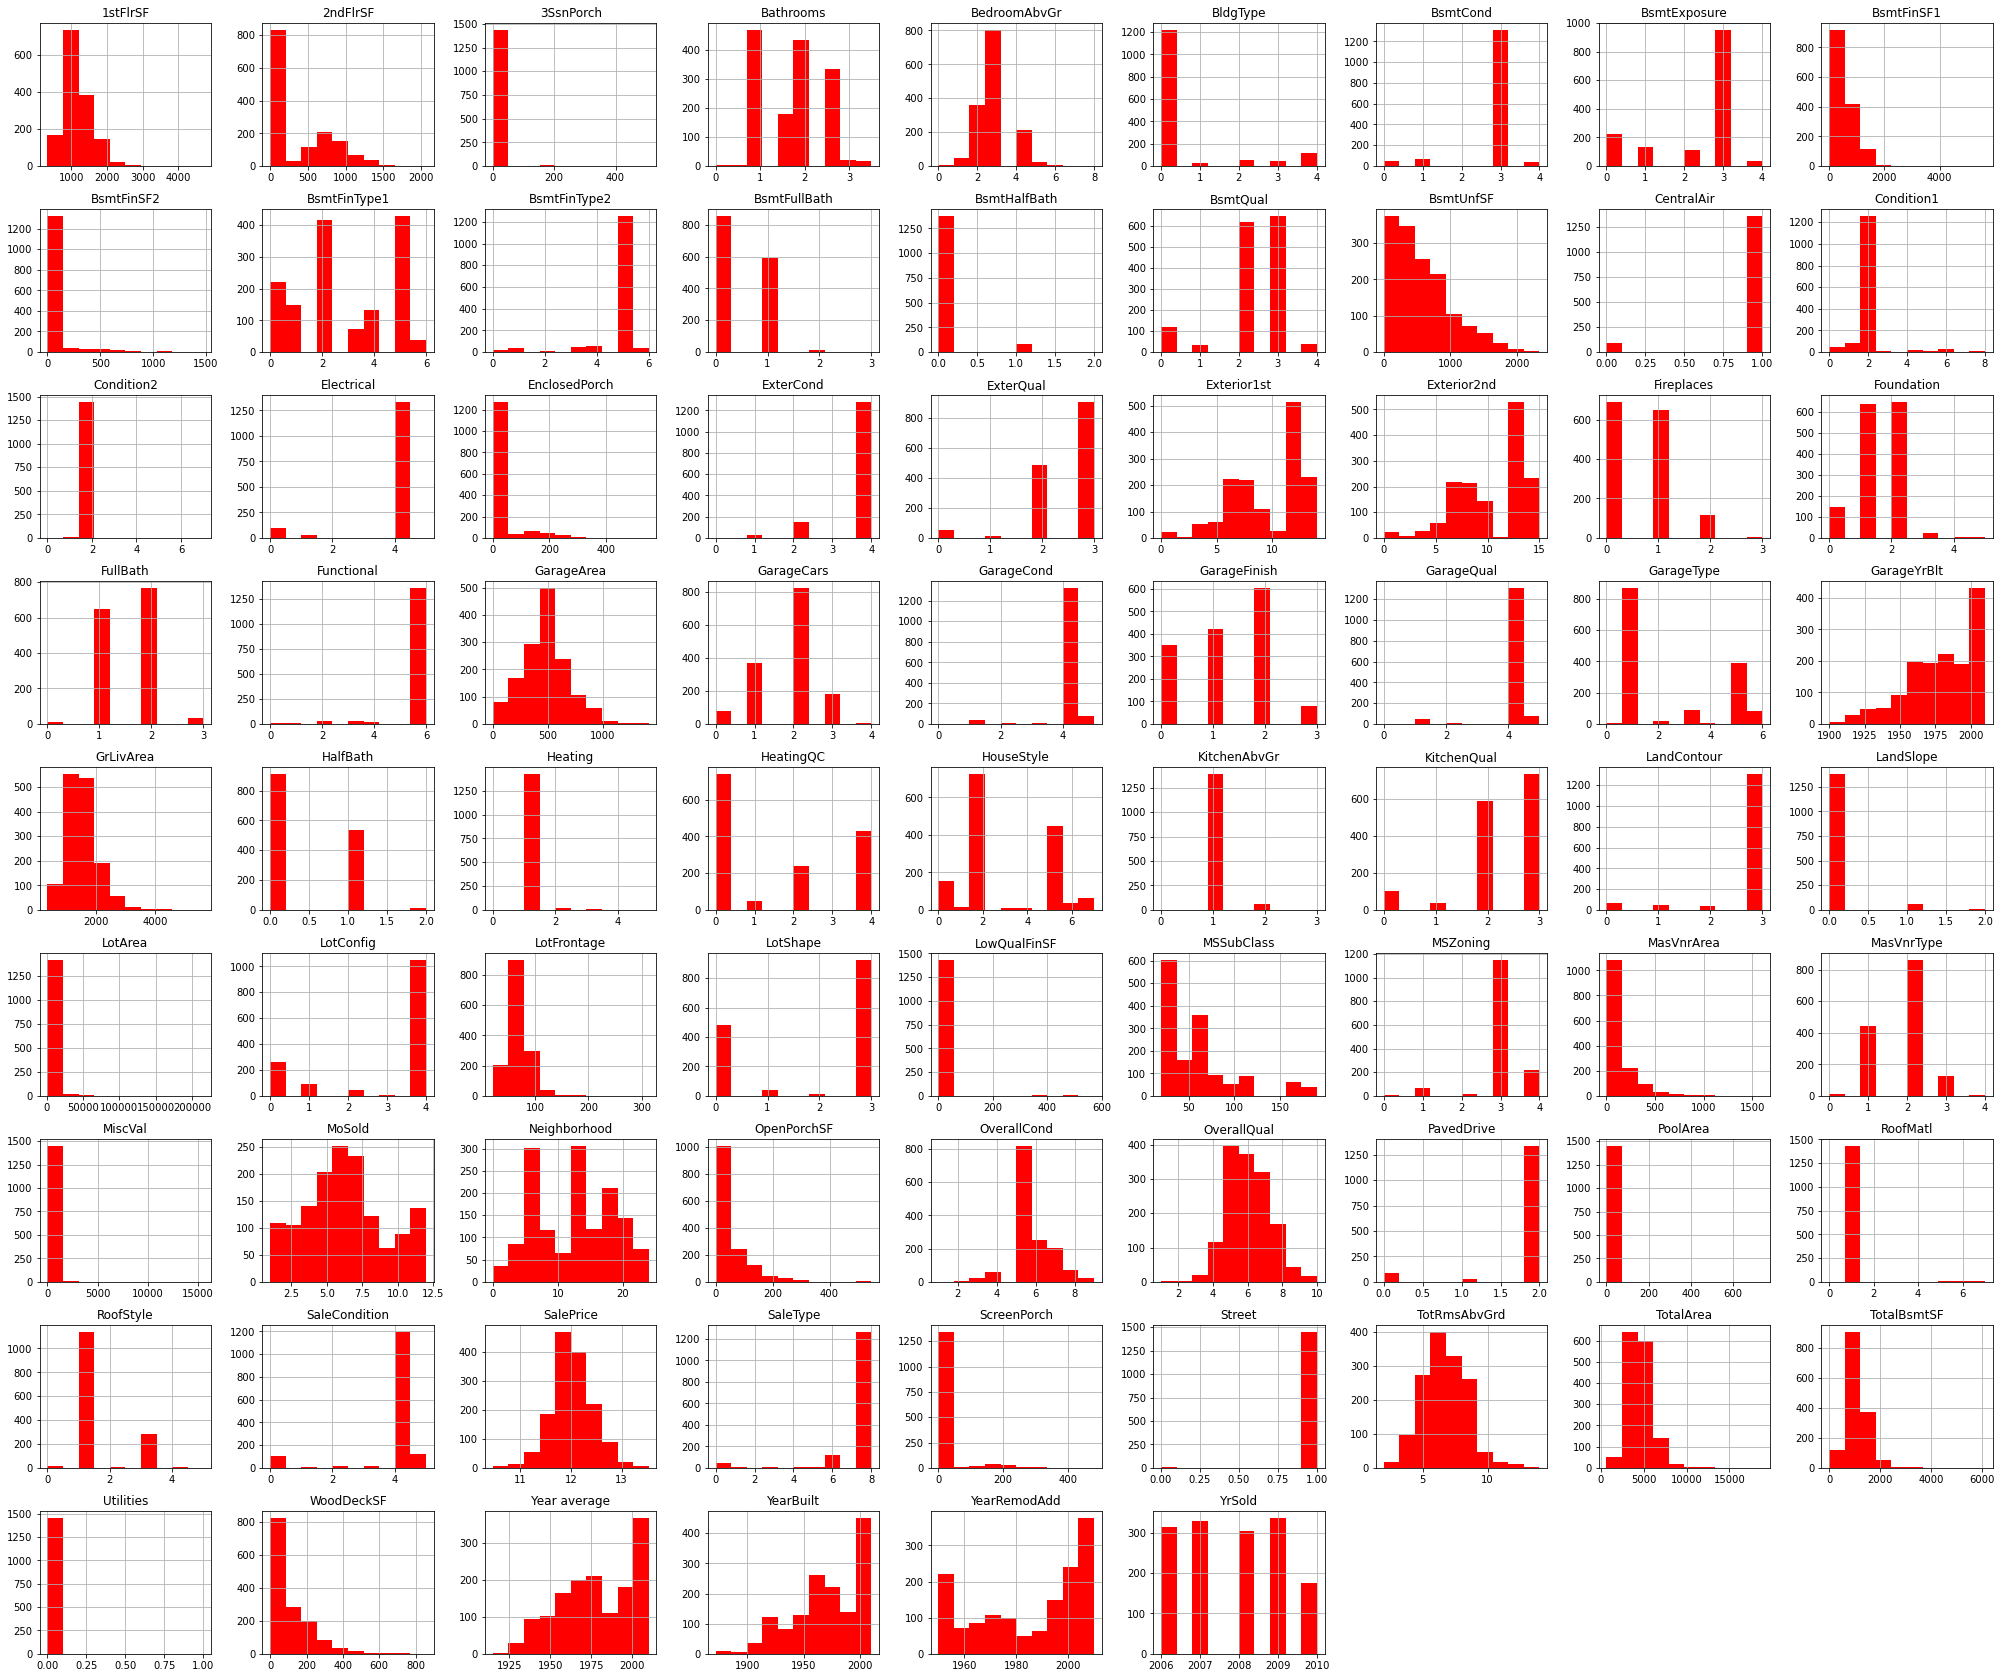

In [23]:
train_data.hist(figsize = (35,30),color = 'red');

## Co-relation between features

Use the pandas correlation function to find the correlation between different features

In [24]:
data_corr = train_data.corr()
data_corr = data_corr.SalePrice
data_corr = data_corr.drop('SalePrice')

In [25]:
strong_corr_feat = data_corr[abs(data_corr) > 0.3].round(2).sort_values(ascending = False)  
# abs() to only take the magnitude
print(strong_corr_feat)
len(strong_corr_feat)
# 29 features that have an impact on the selling prices

OverallQual     0.82
TotalArea       0.80
GrLivArea       0.70
GarageCars      0.68
GarageArea      0.65
Bathrooms       0.64
Year average    0.64
TotalBsmtSF     0.61
1stFlrSF        0.60
YearBuilt       0.59
FullBath        0.59
YearRemodAdd    0.57
TotRmsAbvGrd    0.53
GarageYrBlt     0.50
Fireplaces      0.49
MasVnrArea      0.43
Foundation      0.41
BsmtFinSF1      0.37
CentralAir      0.35
LotFrontage     0.33
WoodDeckSF      0.33
2ndFlrSF        0.32
OpenPorchSF     0.32
HalfBath        0.31
PavedDrive      0.30
BsmtExposure   -0.30
HeatingQC      -0.43
GarageType     -0.50
KitchenQual    -0.53
ExterQual      -0.58
BsmtQual       -0.59
GarageFinish   -0.60
Name: SalePrice, dtype: float64


32

In [26]:
Y_train = train_data['SalePrice']
X_train = train_data.drop('SalePrice',axis = 1)
X_test = test_data

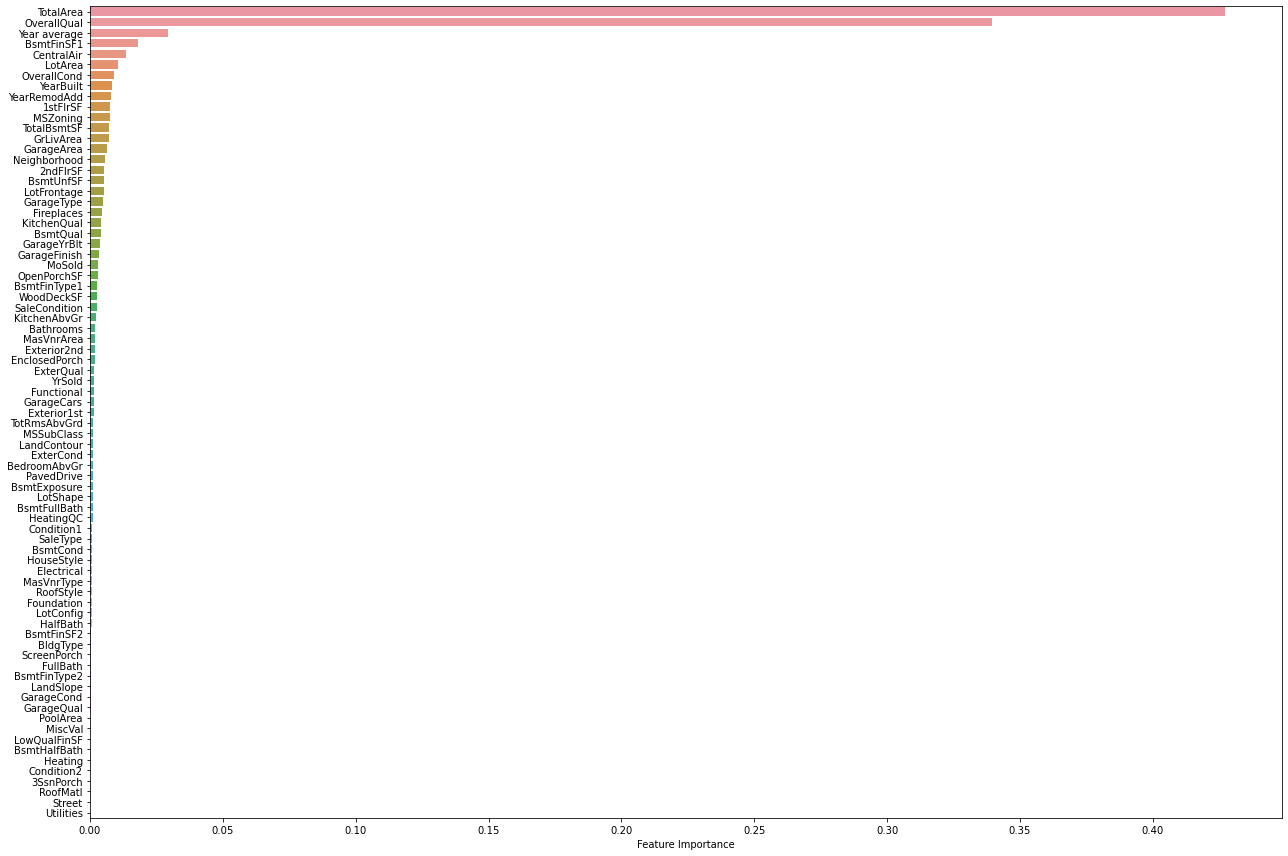

In [27]:
# Feature Importance using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 80)
rf.fit(X_train,Y_train)
ranking = np.argsort(-rf.feature_importances_)
# np.argsort returns indices of features that are of maximum importance
f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()

The above plot shows us how important the different features are to us

It will be suitable to take only the strongly co-related features instead of using all the features for training.
There are 29 strongly co-related features 

strong_corr_features involve only the first 29 features

In [28]:
X_train = X_train.iloc[:,ranking[:29]]
X_test = X_test.iloc[:,ranking[:29]]

In [29]:
# When dealing with pandas dataframes, You cannot directly slice up by using indices. 'df.iloc' allows slicing by using indices

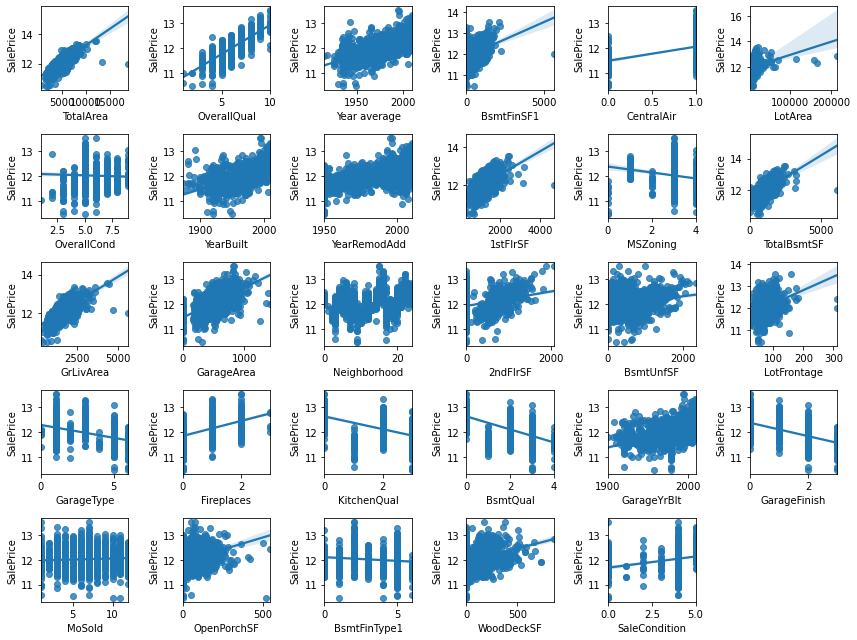

In [30]:
# Now we are going to find out how each and every feature influences the SalePrice in it's own unique way!
fig = plt.figure(figsize = (12,9))
for i in np.arange(29):
    ax = fig.add_subplot(5,6,i + 1)
    sns.regplot(x = X_train.iloc[:,i],y=Y_train)
plt.tight_layout()
plt.show()

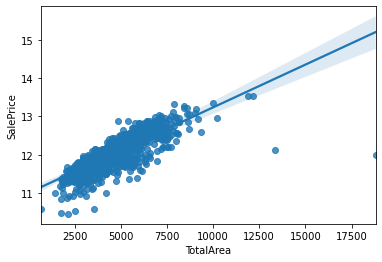

In [31]:
sns.regplot(x = X_train.iloc[:,0],y=Y_train)
plt.show()

In [32]:
# Remove the outliers
X = X_train
X['SalePrice'] = Y_train
X = X.drop(X[(X['YearBuilt']<1900) & (10.75>X['SalePrice']) & (X['SalePrice']>13.0)].index)
X = X.drop(X[(X['TotalArea']>10000)&(10.5<X['SalePrice'])].index)
X = X.drop(X[(X['GrLivArea']>3500) & (10.5>X['SalePrice'])].index)
X = X.drop(X[(X['TotalBsmtSF']>2900) & (10.5>X['SalePrice'])].index)
X = X.drop(X[(200>X['GarageArea']) & (X['GarageArea']>1100) & (X['SalePrice']<10.7)].index)
Y_train = X['SalePrice']
X_train = X.drop(['SalePrice'],axis = 1)

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, Y_train)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

Parameter optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.901614583359368
{'max_depth': 2, 'n_estimators': 200}


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.4s finished


In [34]:
from sklearn.linear_model import Lasso
import sklearn.model_selection as ms
parameters= {'alpha':[0.0001,0.0009,0.001,0.01,0.1,1,10],
            'max_iter':[100,500,1000]}


lasso = Lasso()
lasso_model = ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_model.fit(X_train,Y_train)

print('The best value of Alpha is: ',lasso_model.best_params_)
print(lasso_model.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.485724526322253, tolerance: 0.020645084887159038
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.830688847938545, tolerance: 0.020453203169992523
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.712197401096699, tolerance: 0.020104578394223242
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.3

The best value of Alpha is:  {'alpha': 0.0001, 'max_iter': 100}
-0.015771268787509694


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.671388966811916, tolerance: 0.022735694533183602
  positive)


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid)
reg_dl.fit(X_train, Y_train)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

Using TensorFlow backend.


-0.040034691135549465
{'batch_size': 50, 'epochs': 100, 'optimizer': 'Adam'}


In [36]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(optimizer='Adam',loss='mean_squared_error')
model.fit(X_train,Y_train,batch_size = 10,epochs=100)

Epoch 1/100
1455/1455 [==============================] - 0s 213us/step - loss: 27.9975
Epoch 2/100
1455/1455 [==============================] - 0s 119us/step - loss: 1.7753
Epoch 3/100
1455/1455 [==============================] - 0s 120us/step - loss: 0.1573
Epoch 4/100
1455/1455 [==============================] - 0s 133us/step - loss: 0.1086
Epoch 5/100
1455/1455 [==============================] - 0s 125us/step - loss: 0.0944
Epoch 6/100
1455/1455 [==============================] - 0s 125us/step - loss: 0.0714
Epoch 7/100
1455/1455 [==============================] - 0s 126us/step - loss: 0.1153
Epoch 8/100
1455/1455 [==============================] - 0s 122us/step - loss: 0.4048
Epoch 9/100
1455/1455 [==============================] - 0s 123us/step - loss: 1.6383
Epoch 10/100
1455/1455 [==============================] - 0s 123us/step - loss: 7.9788
Epoch 11/100
1455/1455 [==============================] - 0s 124us/step - loss: 0.1150
Epoch 12/100
1455/1455 [===========================

In [37]:
pred2 = np.exp(model.predict(X_test))
pred2 = pred2.reshape(-1,)
pred2.shape

(1459,)

In [38]:
# SVR
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train, Y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

-0.0004329429250600203
{'C': 10.0, 'gamma': 0.01}


In [39]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
     'NN': reg_dl.predict(X_train).ravel(),
     'SVR': reg_svr.predict(X_train),
    })
X_train2.head()

,XGB,NN,SVR
0,12.233152,12.364836,12.147910
1,12.128764,12.196951,12.027635
2,12.289727,12.408200,12.217298
3,11.919120,12.062830,11.949698
4,12.568813,12.730039,12.329343


In [40]:
# prediction using the test set
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, Y_train)

X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })

# Don't forget to convert the prediction back to non-log scale
y_pred = np.exp(reg.predict(X_test2))


In [41]:
lasso = Lasso(alpha = 0.0001,max_iter = 1000)
lasso.fit(X_train,Y_train)
pred1= np.exp(lasso.predict(X_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.762598009007935, tolerance: 0.022735694533183602
  positive)


In [42]:
xgb1 = xgb.XGBRegressor(max_depth = 2,n_estimators=200)
xgb1.fit(X_train,Y_train)
y_pred = np.exp(xgb1.predict(X_test))

In [43]:
y_pred.shape


(1459,)

In [44]:
test_Id = test['Id']


In [45]:
submission = pd.DataFrame({'Id':test_Id,"SalePrice":pred2})
submission.to_csv('houseprice1.csv',index = False)